# 0. Installation (one time job)

In [ ]:
#!pip install scikit-learn==0.23.1

In [ ]:
#!pip install pandas

In [ ]:
#!pip install matplotlib

# 1. Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree, export_graphviz # Visualize Tree / Rules

# 2. Import ASD Data

In [ ]:
# Loading the dataset
# ASD_data = pd.read_csv('./data.csv')
ASD_data = pd.read_csv('./Toddler Autism dataset.csv')

# Print the first 5 rows of the dataframe.
print(ASD_data.head())

In [ ]:
# Replace special 
ASD_data.columns=ASD_data.columns.str.replace('-','_')
ASD_data.columns=ASD_data.columns.str.replace('/','_')
ASD_data.columns=ASD_data.columns.str.replace(' ','_')
print(ASD_data.head())

In [ ]:
# observing the shape of the data
print(ASD_data.shape)

# 3. Data Preprocessing

## 3.1. Choose appropriate features 

In [ ]:
Sex = pd.Categorical(ASD_data['Sex']).codes
Ethnicity = pd.Categorical(ASD_data['Ethnicity']).codes
Jaundice = pd.Categorical(ASD_data['Jaundice']).codes
Family_mem_with_ASD = pd.Categorical(ASD_data['Family_mem_with_ASD']).codes
Class_ASD_Traits_ = pd.Categorical(ASD_data['Class_ASD_Traits_']).codes

ASD_data['Sex'] = Sex
ASD_data['Ethnicity'] = Ethnicity
ASD_data['Jaundice'] = Jaundice
ASD_data['Family_mem_with_ASD'] = Family_mem_with_ASD
ASD_data['Class_ASD_Traits_'] = Class_ASD_Traits_

# Check the data and think why we drop these variables?
# X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Score', 'ASD_Traits', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'], axis=1)
X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Qchat_10_Score', 'Class_ASD_Traits_'], axis=1)


In [ ]:
X.columns

## 3.2 Choose target

In [ ]:
Y_classification = ASD_data.Class_ASD_Traits_
Y_regression = ASD_data.Qchat_10_Score

# 4. Build Classification Tree

## 4.1 Split the dataset into training set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 3, random_state=1,
                                                    stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

## 4.2 Build classification tree

In [ ]:
dt = DecisionTreeClassifier(criterion='gini',random_state=0)
dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
dt

## 4.3. Use grid search to optimize the parameters

In [ ]:

best_para = {'max_depth':0, 'min_samples':0}
best_test_acc = 0

# grid serach
for max_depth in range(1, 10):
    for min_samples in range(2,100):
        dt = DecisionTreeClassifier(criterion='gini',max_depth=max_depth, min_samples_split = min_samples, random_state=0)
        dt.fit(X_train, y_train)
        if dt.score(X_test, y_test) > best_test_acc:
            best_test_acc = dt.score(X_test, y_test)
            best_para['max_depth'] = max_depth
            best_para['min_samples'] = min_samples

dt = DecisionTreeClassifier(criterion='gini',max_depth=best_para['max_depth'], min_samples_split = best_para['min_samples'], random_state=0)
dt.fit(X_train, y_train)
print("Best accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Best accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
print("Best decision tree with parameter max_depth of {0} and min_samples_split of {1}".format(best_para['max_depth'], best_para['min_samples']))

# 5. Build Regression Tree

## 5.1 Split the dataset into training set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_regression, test_size=1 / 3, random_state=42)
print(X_train.shape)
print(X_test.shape)

## 5.2 Build regreesion tree

In [ ]:
dt = DecisionTreeRegressor(criterion='mse',random_state=0)
dt.fit(X_train, y_train)


print("Score on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(dt.score(X_test, y_test)))

## 5.3. Use grid search to optimize the parameters

In [ ]:
best_para = {'max_depth':0, 'min_samples':0}
best_test_acc = 0
# grid serach
for max_depth in range(1, 20):
    for min_samples in range(2,50):
        dt = DecisionTreeRegressor(criterion='mse',max_depth=max_depth, min_samples_split = min_samples, random_state=0)
        dt.fit(X_train, y_train)
        if dt.score(X_test, y_test) > best_test_acc:
            best_test_acc = dt.score(X_test, y_test)
            best_para['max_depth'] = max_depth
            best_para['min_samples'] = min_samples

dt = DecisionTreeRegressor(criterion='mse',max_depth=best_para['max_depth'], min_samples_split = best_para['min_samples'], random_state=0)
dt.fit(X_train, y_train)
print("Best score on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Best score on test set: {:.3f}".format(dt.score(X_test, y_test)))
print("Best regression tree with parameter max_depth of {0} and min_samples_split of {1}".format(best_para['max_depth'], best_para['min_samples']))


# 6. Extract all the rules (Decsion Tree's level = 8) from the classification tree

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

(702, 15)
(352, 15)
                if A7 <= 0.5:
                  if A9 <= 0.5:
                    if A2 <= 0.5:
                      if A5 <= 0.5:
                        if A3 <= 0.5:
                          return [[117.   0.]]
                        else:  # if A3 > 0.5
                          if A8 <= 0.5:
                            if A10 <= 0.5:
                              return [[10.  0.]]
                            else:  # if A10 > 0.5
                              if A4 <= 0.5:
                                return [[3. 0.]]
                              else:  # if A4 > 0.5
                                return [[0. 1.]]
                          else:  # if A8 > 0.5
                            return [[0. 2.]]
                      else:  # if A5 > 0.5
                        if A8 <= 0.5:
                          if Jaundice <= 0.5:
                            return [[10.  0.]]
                          else:  # if Jaundice > 0.5
                        

[Text(807.1890410958904, 616.08, 'A7 <= 0.5\ngini = 0.427\nsamples = 702\nvalue = [217, 485]'),
 Text(434.55205479452053, 543.6, 'A9 <= 0.5\ngini = 0.434\nsamples = 254\nvalue = [173, 81]'),
 Text(254.53972602739725, 471.12, 'A2 <= 0.5\ngini = 0.274\nsamples = 195\nvalue = [163, 32]'),
 Text(100.8986301369863, 398.64000000000004, 'A5 <= 0.5\ngini = 0.133\nsamples = 154\nvalue = [143, 11]'),
 Text(36.69041095890411, 326.16, 'A3 <= 0.5\ngini = 0.044\nsamples = 133\nvalue = [130, 3]'),
 Text(18.345205479452055, 253.68, 'gini = 0.0\nsamples = 117\nvalue = [117, 0]'),
 Text(55.035616438356165, 253.68, 'A8 <= 0.5\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(36.69041095890411, 181.20000000000005, 'A10 <= 0.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(18.345205479452055, 108.72000000000003, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(55.035616438356165, 108.72000000000003, 'A4 <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(36.69041095890411, 36.240000000

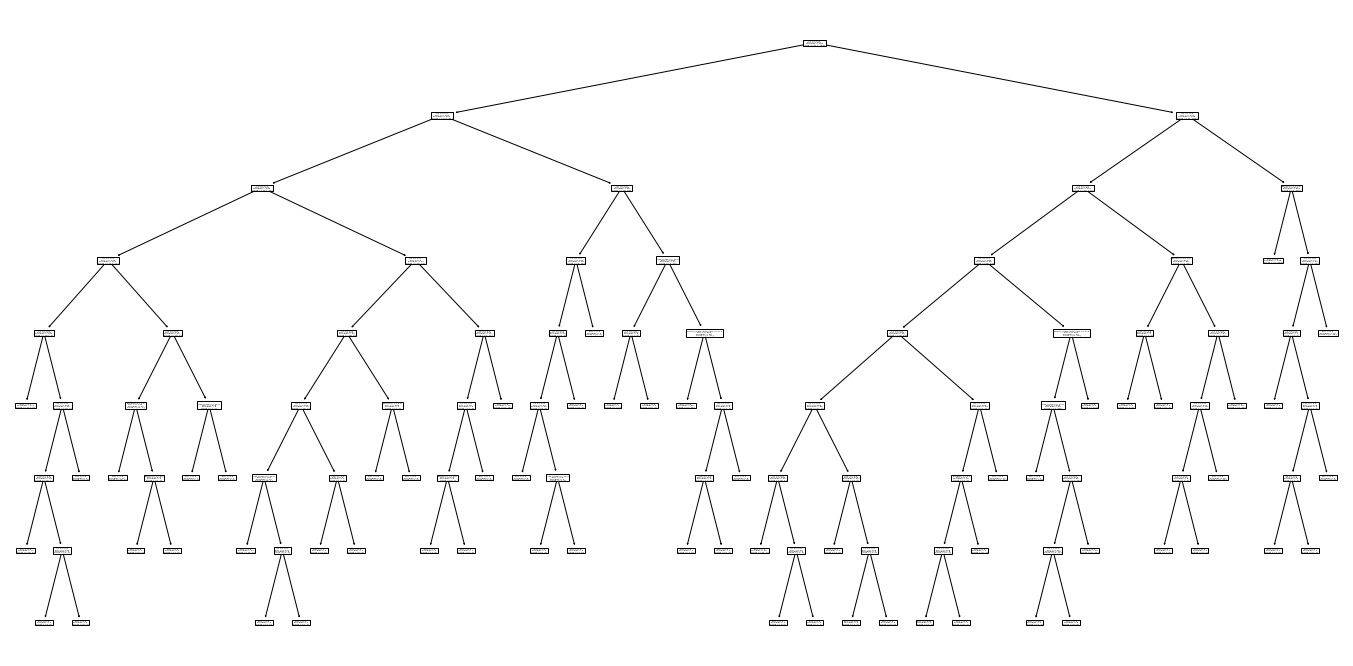

In [50]:
###################################################################
# Extract all the rules from the classification tree
###################################################################
from sklearn import tree
from sklearn.tree import _tree

X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 3, random_state=1,stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)


dt = DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=8)
dt.fit(X_train, y_train)

#tree_ = mydt.tree_

def tree_to_code(dt, feature_names):
    tree_ = dt.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 8)

tree_to_code(mydt, X.columns)
tree.plot_tree(dt,feature_names=X.columns)



### Useful Tips:

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 3, random_state=1,
                                                    stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)

dt = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=3)
dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
dt

(702, 15)
(352, 15)
Accuracy on training set: 0.879
Accuracy on test set: 0.838


DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
plt.rcParams['figure.figsize'] = [24, 12] # Optionally adjust inline graph size

### install graphviz

In [ ]:
#!pip install graphviz

Also in Linux terminal: sudo apt install graphviz

In [ ]:
import graphviz 
dot_data = export_graphviz(dt, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['Not ASD', 'ASD'], # "0": Not ASD ; "1": ASD
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
# graph
graph.render("tree_rules_image", view=True)
f = open("tree_rules.txt","w+")
f.write(dot_data)
f.close()


---
`The end is called new start.` --- ISS **I** **S**(elf) **S**(tudy)